In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np
import math
from qiskit import BasicAer, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy

In [3]:
q=QuantumRegister(3)
c=ClassicalRegister(3)
qc=QuantumCircuit(q,c)

#initial state of the second and third qubit (eigenstate)
state_vector=[math.sqrt(3087/(3087 + 906 + 1405 + 58)),math.sqrt(906/(3087 + 906 + 1405 + 58)),math.sqrt(1405/(3087 + 906 + 1405 + 58)),math.sqrt(58/(3087 + 906 + 1405 + 58))]
qc.initialize(state_vector,[q[1],q[2]])

In [4]:
state_vector

[0.7521961979660653,
 0.4074993478216539,
 0.5074590256923196,
 0.10310430899688111]

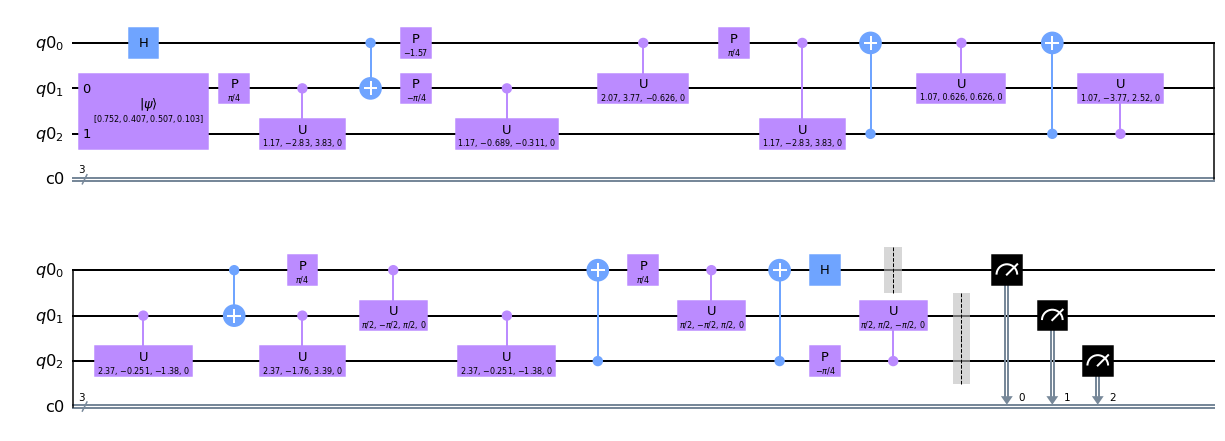

In [5]:
#preparation of the first qubits (1-bit eigenvalue estimation)
qc.h(q[0])

#controlled Urho
#cV1
qc.p(0.785398,q[1])
qc.cu(1.1747,-2.83038,3.83087,0,q[1],q[2])
#cX
qc.cx(q[0],q[1])
#cV1dag
qc.p(-0.785398,q[1])
qc.cu(1.1747,-0.689273,-0.31121,0,q[1],q[2])
#cXV2X
qc.p(-1.5708,q[0])
qc.cu(2.07033,3.76782,-0.626228,0,q[0],q[1])
#cV1
qc.p(0.785398,q[0])
qc.cu(1.1747,-2.83038,3.83087,0,q[0],q[2])
#cX
qc.cx(q[2],q[0])
#cV2Xdag
qc.cu(1.07126,0.626228,0.626228,0,q[0],q[1])
#cX
qc.cx(q[2],q[0])
#cV2X
qc.cu(1.07126,-3.76782,2.51536,0,q[2],q[1])
#cV3
qc.cu(2.3749,-0.251338,-1.38469,0,q[1],q[2])
#cX
qc.cx(q[0],q[1])
#cV3dag
qc.cu(2.3749,-1.7569,3.39293,0,q[1],q[2])
#cXvx
qc.p(1/4*np.pi,q[0])
qc.cu(1/2*np.pi,-1/2*np.pi,1/2*np.pi,0,q[0],q[1])
#cV3
qc.cu(2.3749,-0.251338,-1.38469,0,q[1],q[2])
#cX
qc.cx(q[2],q[0])
#cVxdag
qc.p(1/4*np.pi,q[0])
qc.cu(1/2*np.pi,-1/2*np.pi,1/2*np.pi,0,q[0],q[1])
#cX
qc.cx(q[2],q[0])
#cVx
qc.p(-1/4*np.pi,q[2])
qc.cu(1/2*np.pi,1/2*np.pi,-1/2*np.pi,0,q[2],q[1])

#InverseQFT
qc.h(q[0])

##meassure on basis II
#qc.h(q[1])
##meassure on basis III
#qc.h(q[2])
##meassure on basis IV
#qc.h(q[1])
#qc.h(q[2])

#projection and meassurement
qc.barrier(q[0])
qc.barrier(q[1])
qc.barrier(q[2])
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])
qc.draw(output='mpl')



In [5]:
#Run on qasm simulator
backend_qasm=BasicAer.get_backend('qasm_simulator')
job_qasm=execute(qc,backend_qasm,shots=8192)
result_qasm=job_qasm.result()
counts=result_qasm.get_counts(qc)
print(counts)
sim_jobID=job_qasm.job_id()
print('SIMULATION JOB ID: {}'.format(sim_jobID))

# #Run on real device
# backend_exp=IBMQ.get_backend('ibmqx2')
# backend_exp.name()
# job_exp=execute(qc,backend_exp,shots=8192)#,max_credits=3)
# job_monitor(job_exp)
# result_exp=job_exp.result()
# counts_exp = result_exp.get_counts()
# print(counts_exp)
# plot_histogram([counts_exp,counts])
# jobID=job_exp.job_id()
# print('JOB ID: {}'.format(jobID)) 

{'000': 2736, '101': 2467, '001': 1017, '010': 337, '100': 350, '110': 1103, '011': 182}
SIMULATION JOB ID: 00c020eb-4a84-4359-b903-62bfb235284e


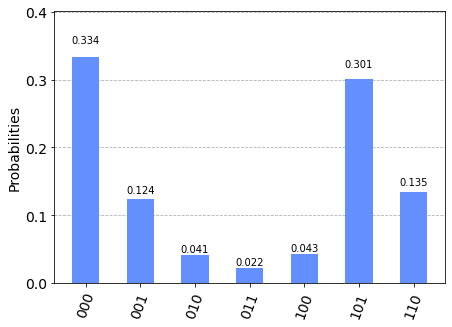

In [6]:
plot_histogram(counts)